In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.model_selection import train_test_split, KFold,  GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
pip install pyreadr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 361 kB 5.3 MB/s 


In [ ]:
import pyreadr

result = pyreadr.read_r('/content/model_df.RDS')

df = result[None]

In [ ]:
df.head()

,market_code,amendment_attr.amendment_start_dt,amendment_type_name,customer_category,amendment_term,NRA,amendment_unit_cnt,TI,lca_wgt_prps_comm_amt,lca_start_cash_rent_amt,lca_procu_brkge_comm_amt,lca_list_broker_comm_amt,Free.Rent,lease_type_code,lease_type_name,amendment_sign_dt,current_status,submarket_code,submarket_name,market_name,property_city,ownr_accntg_treatmt_name,vat_opted_flag,commercial_flag,usage_type_descr,prop_car_parking_spaces,prop_trailer_parking_spaces,prop_main_trans_owner,prop_main_trans_voltage,prop_main_trans_kvasize,prop_main_trans_amperage,prop_rail_served,prop_building_facade,prop_site_security,prop_cross_dock,prop_speed_bay_depth,prop_truck_court_depth,prop_column_spacing1,prop_column_spacing2,prop_backup_generator,prop_battery_storage,prop_electric_car_charging,prop_fuel_cell,prop_geothermal,prop_hydrogen_frklft,prop_solar_hot_water,prop_solar_pv,prop_wind,prop_electric_truck_charging,prop_exterior_lighting,building_structre_desc,trailer_park_flg,ramped_building_flg,floor_flat_quality_desc,floor_load_capcity_desc,elevator_flg,fire_suppn_sys_desc,irrigation_system_flg,power_desc,seismic_mitigation_desc,value_added_attribute_name,substn_comp_cert_desc,ext_site_light_type,strategy_code,property_source_code,origin_code,management_structure_code,proprollup_code,property_type_gross_area,property_type_nra,property_type_footprint_area,property_type_non_stat_area,property_type_land_area,property_type_site_cvrge_area,property_type_bldbl_area,prop_building_depth,prop_building_length,grade_lvl_doors_cnt,dock_high_doors_cnt,clearance_height_msmnt,no_of_properties_in_park,prop_attr_unit_of_measure,prop_office_area,skylights_flg,Free.Rent.Months.Modified,customer_active_in_property_in_days,customer_active_in_property,prop_trailer_park_flg,prop_total_parking_space,prop_total_door,prop_total_parking_space_per_nra,prop_total_door_per_nra,Building_Age,prop_building_aspect_ratio,clearance_volume,NRA_percentile_in_market,avg_market_NRA_ratio,pu_data_office_area_msmnt,legacy_new_unit,cross_dock,sub_metering,office_lighting_type,fire_suppression_system,hvac_warehouse,kva_rights_owner,smart_meter_system,mezzanine_lighting_type,warehouse_lighting_type,nAmendments_starts_b4,nAmendments_end_b4,is_first_time_customer,n_active_amendments,dct_flg,customer_type_name,customer_tenant_naics_code,customer_tenant_naics_name
0,US_INLAND_EMPIRE,2014-12-31 18:30:00,Renewal,3PL,12,179544.0,1,0.00000,20845.06,4.701709,20845.06,0.00,0,nnnpm,Triple Net - Property Management Fee,NA,Operating,INE_INLAND_EMP_WEST,ine-Inland Emp West,US-Inland Empire,Ontario,Consolidated,N,Y,Bulk - Regional Distribution - Warehouse,206.0,166,Utility,277/480,300.000000,360.000000,No,Tilt-Up Concrete,Fence,No,48.0,1.0,48.0,48.0,No,No,No,No,No,No,No,No,No,No,Metal Halide,CLASS B-CTU,N,N,NA,NA,N,ESFR,Y,2000AMPS 480/277,No,NA,No,Metal Halide,Hold,Acquisition,Legacy PLD,Prologis,Inland Empire DC,405864.0,405864.0,0.0,0.0,720482.4,0.0,405864.0,335.0,1166.0,3,54,32.0,12,NA,0,Y,0,126144000.0,4.135869e+06,True,704.0,57,0.001735,0.000140,27,3.480597,5745408.0,0.620422,3.538842,5400,new unit,No,No,T5/T8 Fluorescent,ESFR,None,Utility,No,No Mezzanine Space,T5/T8 Fluorescent,40,29,0,11,0,Global Customer,transpt_dist_service,Transportation and Distribution Services
1,US_INLAND_EMPIRE,2015-03-31 18:30:00,Renewal,Manufacturer,12,562089.0,1,0.00000,0.00,5.248419,0.00,0.00,0,pldclear,Prologis Clear Lease,2015-01-26 00:00:00,Operating,INE_INLAND_EMP_WEST,ine-Inland Emp West,US-Inland Empire,Ontario,Consolidated,N,Y,Bulk - Regional Distribution - Warehouse,368.0,0,Utility,277/480,1000.000000,1200.000000,No,Tilt-Up Concrete,Fence,No,60.0,152.0,60.0,52.0,No,No,No,No,No,No,No,Yes,No,No,Metal Halide,Tilt-up Concrete,N,Y,NA,NA,N,ESFRK16,Y,277/480 2000AMPS,No,NA,Yes,Metal Halide,Hold,Development - Speculative,Legacy PLD,Prologis,Ontario Airport Bldg,562089.0,562089.0,0.0,0.0,1153904.4,0.0,562089.0,266.0,2087.0,4,96,31.5,4,NA,0,Y,0,165715200.0,5.433285e+06,False,368.0,100,0.000655,0.00017

In [ ]:
df.shape

(654, 116)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Columns: 116 entries, market_code to customer_tenant_naics_name
dtypes: bool(1), datetime64[ns](1), float64(32), int32(17), object(65)
memory usage: 544.9+ KB


**DATA VALIDATION**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


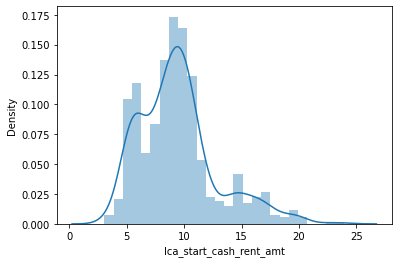

In [ ]:
sns.distplot(df['lca_start_cash_rent_amt'])

In [ ]:
def singlevaluecol(df):

  l=[]
  for i in df.columns:

    if df[i].nunique()==1:

      l.append(i)

  print(l)

In [ ]:
print(singlevaluecol(df))

[]
None


In [ ]:
def detectnumcolswithfewvalues(df):

  cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']
  num_col_with_few_val=[]
  for i in cols_num:

    if df[i].nunique()<=2:

      num_col_with_few_val.append(i)

  print("Numerical columns with very few unique values:",num_col_with_few_val)

In [ ]:
print(detectnumcolswithfewvalues(df))

Numerical columns with very few unique values: ['property_type_non_stat_area', 'is_first_time_customer', 'dct_flg']
None


In [ ]:
def convertnumtocat(df,l):
  
  
  for i in l:

    df[i]=df[i].astype('object')

  
    
   



In [ ]:
convertnumtocat(df,['is_first_time_customer', 'dct_flg'])

In [ ]:
def verylessuniquevalnumcols(df):

  cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']

  counts=df[cols_num].nunique()
  
  #Filtering out columns whose percentage of unique values wrt to tal no of records is less than 1 percent
  cols_very_few_unique=[i for i,v in counts.items() if (float(v)/df.shape[0]*100)<1]

  print(cols_very_few_unique)
  




In [ ]:
print(verylessuniquevalnumcols(df))

['amendment_unit_cnt', 'property_type_non_stat_area', 'property_type_site_cvrge_area']
None


In [ ]:
# Function to compute almost constant columns and relative frequencies of corresponding modes
def almost_constant(df, threshold = 0.9, show = True, return_list = True):
    rel_freq = []
    for col in df.columns:
        mode_rel_freq = max(df[col].value_counts(sort = True)/len(df[col]))
        if mode_rel_freq > threshold:
            rel_freq.append((col, mode_rel_freq))
    keys = [item[0] for item in rel_freq]
    values = [item[1] for item in rel_freq]
    series = pd.Series(data = values, index = keys).sort_values(ascending = False)
    if show == True:
        print(series.to_string())
    if return_list == True:
        return keys

In [ ]:
almost_constant_cols = almost_constant(df.drop('lca_start_cash_rent_amt', axis = 1), threshold = 0.95)

property_type_non_stat_area      0.998471
value_added_attribute_name       0.996942
floor_flat_quality_desc          0.995413
property_type_site_cvrge_area    0.995413
floor_load_capcity_desc          0.993884
amendment_unit_cnt               0.992355
management_structure_code        0.980122
property_type_footprint_area     0.975535
substn_comp_cert_desc            0.972477
legacy_new_unit                  0.966361
prop_battery_storage             0.961774
vat_opted_flag                   0.955657
prop_electric_truck_charging     0.951070


**DROPPING THOSE COLUMNS WHERE ONE VALUE DOMINATES LARGELY,CHECKPOINT 1**

In [ ]:
df.drop(columns=almost_constant_cols,axis=1,inplace=True)

In [ ]:
df.shape

(654, 103)

In [ ]:
# Function to detect pairs with extreme correlation
def pairs_with_strong_corr(df, cols, threshold = 0.8, show = True, return_variables = False):
    variable_list = []
    corr_positive_list = []
    corr_negative_list = []
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i<j:
                corr = df[cols[i]].corr(df[cols[j]])
                if corr > threshold:
                    variable_list = variable_list + [cols[i], cols[j]]
                    corr_positive_list.append(((cols[i], cols[j]), corr))
                if corr < -threshold:
                    variable_list = variable_list + [cols[i], cols[j]]
                    corr_negative_list.append(((cols[i], cols[j]), corr))
    if show == True:
        corr_positive = pd.Series(data = [item[1] for item in corr_positive_list], index = [item[0] for item in corr_positive_list])
        corr_negative = pd.Series(data = [item[1] for item in corr_negative_list], index = [item[0] for item in corr_negative_list])
        print("Pairs with extreme positive correlation:")
        print(" ")
        print(corr_positive.sort_values(ascending = False).to_string())
        print(" ")
        print("Pairs with extreme negative correlation:")
        print(" ")
        print(corr_negative.sort_values(ascending = True).to_string())
    if return_variables == True:
        return variable_list

In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']

In [ ]:
# Detecting pairs with extreme correlation
cols_selected = [col for col in cols_num if col != 'lca_start_cash_rent_amt']
pairs_with_strong_corr(df = df, cols = cols_selected, threshold = 0.9)

Pairs with extreme positive correlation:
 
(NRA, avg_market_NRA_ratio)                                           1.000000
(customer_active_in_property_in_days, customer_active_in_property)    1.000000
(dock_high_doors_cnt, prop_total_door)                                0.994697
(property_type_nra, property_type_bldbl_area)                         0.987483
(clearance_volume, avg_market_NRA_ratio)                              0.983129
(NRA, clearance_volume)                                               0.983129
(lca_wgt_prps_comm_amt, lca_procu_brkge_comm_amt)                     0.967632
(nAmendments_starts_b4, nAmendments_end_b4)                           0.967572
(property_type_gross_area, property_type_nra)                         0.900307
 
Pairs with extreme negative correlation:
 
Series([], )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


**FEATURE ENGINEERING OF SOME OF THE OBVIOUS COLUMNS**

In [ ]:
door_features=[col for col in df.columns if 'door' in col]
print(door_features)

['prop_total_door_per_nra']


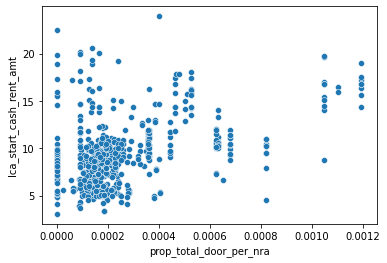

In [ ]:
sns.scatterplot(x='prop_total_door_per_nra',y='lca_start_cash_rent_amt',data=df)

**KEEPING ONLY DOOR PER NRA COLUMN,CHECKPOINT 2**

In [ ]:
df.drop(columns=['grade_lvl_doors_cnt', 'dock_high_doors_cnt', 'prop_total_door'],axis=1,inplace=True)

In [ ]:
building_features=[col for col in df.columns if 'building' in col]
print(building_features)

['prop_building_facade', 'building_structre_desc', 'ramped_building_flg', 'prop_building_depth', 'prop_building_length', 'prop_building_aspect_ratio']


In [ ]:
df['prop_building_facade'].value_counts()

Tilt-Up Concrete              585
Other                          35
NA                             21
Metal Panel                     5
Concrete Block-Metal Panel      5
Concrete Block-Masonry          3
Name: prop_building_facade, dtype: int64

In [ ]:
df.groupby('prop_building_facade')['lca_start_cash_rent_amt'].mean()

prop_building_facade
Concrete Block-Masonry        12.633790
Concrete Block-Metal Panel     5.561524
Metal Panel                   13.115068
NA                             7.653971
Other                         10.479991
Tilt-Up Concrete               9.411882
Name: lca_start_cash_rent_amt, dtype: float64

In [ ]:
df[['prop_building_depth', 'prop_building_length', 'prop_building_aspect_ratio']]

,prop_building_depth,prop_building_length,prop_building_aspect_ratio
0,335.0,1166.0,3.480597
1,266.0,2087.0,7.845865
2,570.0,791.0,1.387719
3,253.0,491.0,1.940711
4,410.0,1965.0,4.792683
...,...,...,...
649,175.0,512.0,2.925714
650,158.0,435.0,2.753165
651,60.0,354.0,5.900000
652,88.0,228.0,2.590909


In [ ]:
df.drop(columns=['prop_building_depth', 'prop_building_length'],axis=1,inplace=True)

In [ ]:
df['prop_building_aspect_ratio']

0      3.480597
1      7.845865
2      1.387719
3      1.940711
4      4.792683
         ...   
649    2.925714
650    2.753165
651    5.900000
652    2.590909
653    1.314286
Name: prop_building_aspect_ratio, Length: 654, dtype: float64

In [ ]:
df.groupby('building_structre_desc')['lca_start_cash_rent_amt'].mean().sort_values(ascending=False)

building_structre_desc
Brick, stucco, wood frame, & steel    16.202141
concrete tilt-up                      14.270000
Concrete Tilt Up                      11.262358
CTU                                   10.849519
Steel Frame Construction              10.424826
Concrete Tilt Up 12406/12420          10.277924
Concrete Tilt up                      10.199543
tilt up                                9.937994
Brick                                  9.622854
Concrete Tilt Up 12300/12316           9.568784
Concrete Tilt-Up                       9.489838
Concrete tilt up                       9.294008
Cocnrete Tilt-up                       9.154799
Concrete Tilt-Up 2661/2665             9.120000
Concrete Tilt-up                       9.116144
Steel Structure                        8.780000
Concrete Tilt Up & Concrete Bricks     8.667454
concrete tilt up                       8.614627
Tilt up                                8.127711
NA                                     8.122206
Concrete Tilt-Up 

In [ ]:
df.groupby('ramped_building_flg')['lca_start_cash_rent_amt'].mean().sort_values(ascending=False)

ramped_building_flg
Y    9.430045
N    9.422874
Name: lca_start_cash_rent_amt, dtype: float64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):

  vif=pd.DataFrame()
  vif["features"]=data.columns
  vif["VIF_value"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]

  return(vif)



In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']

In [ ]:
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF_value
37,n_active_amendments,inf
36,nAmendments_end_b4,inf
35,nAmendments_starts_b4,inf
33,avg_market_NRA_ratio,inf
26,prop_total_parking_space,inf
25,customer_active_in_property,inf
24,customer_active_in_property_in_days,inf
8,prop_car_parking_spaces,inf
9,prop_trailer_parking_spaces,inf
1,NRA,inf


In [ ]:
df[['n_active_amendments','nAmendments_end_b4','nAmendments_starts_b4']]

,n_active_amendments,nAmendments_end_b4,nAmendments_starts_b4
0,11,29,40
1,6,4,10
2,1,1,2
3,3,5,8
4,2,13,15
...,...,...,...
649,2,4,6
650,0,0,0
651,0,2,2
652,0,0,0


**KEEPING ONLY nAmendments_starts_b4 column and dropping the other 2,CHECKPOINT-3**

In [ ]:
df.drop(columns=['n_active_amendments','nAmendments_end_b4'],axis=1,inplace=True)

In [ ]:
df.shape

(654, 96)

**KEEPING ONLY NRA AND DROPPING AVG_MARKET_NRA**

In [ ]:
df.drop(columns=['avg_market_NRA_ratio'],axis=1,inplace=True)

In [ ]:
cols_obj=[col for col in df.columns if df[col].dtype=='object']

**DROPPING PARKING VARIABLES**

In [ ]:
park_variables=[col for col in df.columns if 'park' in col]
print(park_variables)

['prop_car_parking_spaces', 'prop_trailer_parking_spaces', 'trailer_park_flg', 'no_of_properties_in_park', 'prop_trailer_park_flg', 'prop_total_parking_space', 'prop_total_parking_space_per_nra']


In [ ]:
df[park_variables].corr()

,prop_car_parking_spaces,prop_trailer_parking_spaces,no_of_properties_in_park,prop_trailer_park_flg,prop_total_parking_space,prop_total_parking_space_per_nra
prop_car_parking_spaces,1.000000,0.194016,-0.124824,0.156246,0.736088,0.019407
prop_trailer_parking_spaces,0.194016,1.000000,0.085629,0.707038,0.806837,-0.054935
no_of_properties_in_park,-0.124824,0.085629,1.000000,0.030140,-0.016087,0.192719
prop_trailer_park_flg,0.156246,0.707038,0.030140,1.000000,0.581948,-0.141312
prop_total_parking_space,0.736088,0.806837,-0.016087,0.581948,1.000000,-0.026217
prop_total_parking_space_per_nra,0.019407,-0.054935,0.192719,-0.141312,-0.026217,1.000000


In [ ]:
df[['prop_car_parking_spaces','prop_trailer_parking_spaces','prop_total_parking_space']]

,prop_car_parking_spaces,prop_trailer_parking_spaces,prop_total_parking_space
0,206.0,166,704.0
1,368.0,0,368.0
2,163.0,99,460.0
3,160.0,0,160.0
4,133.0,196,721.0
...,...,...,...
649,75.0,0,75.0
650,86.0,0,86.0
651,94.0,0,94.0
652,71.0,0,71.0


In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']

In [ ]:
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF_value
9,prop_trailer_parking_spaces,inf
26,prop_total_parking_space,inf
24,customer_active_in_property_in_days,inf
25,customer_active_in_property,inf
8,prop_car_parking_spaces,inf
17,property_type_nra,140.208482
19,property_type_bldbl_area,93.953057
1,NRA,84.398178
31,clearance_volume,69.301104
3,lca_wgt_prps_comm_amt,42.324337


In [ ]:
df.drop(columns=['prop_trailer_parking_spaces','prop_total_parking_space','prop_car_parking_spaces'],axis=1,inplace=True)

In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']

In [ ]:
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF_value
23,customer_active_in_property,inf
22,customer_active_in_property_in_days,inf
15,property_type_nra,132.329435
17,property_type_bldbl_area,93.232583
1,NRA,81.427891
28,clearance_volume,65.062025
3,lca_wgt_prps_comm_amt,41.172206
18,clearance_height_msmnt,30.531089
29,NRA_percentile_in_market,25.461289
5,lca_procu_brkge_comm_amt,22.729344


In [ ]:
df.drop(columns=['customer_active_in_property'],axis=1,inplace=True)

In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

,features,VIF_value
15,property_type_nra,132.329435
17,property_type_bldbl_area,93.232583
1,NRA,81.427891
27,clearance_volume,65.062025
3,lca_wgt_prps_comm_amt,41.172206
18,clearance_height_msmnt,30.531089
28,NRA_percentile_in_market,25.461289
5,lca_procu_brkge_comm_amt,22.729344
12,prop_column_spacing1,18.127461
10,prop_speed_bay_depth,13.915922


In [ ]:
df.drop(columns=['property_type_bldbl_area','property_type_nra'],axis=1,inplace=True)

In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

,features,VIF_value
1,NRA,75.903387
25,clearance_volume,61.687360
3,lca_wgt_prps_comm_amt,41.005788
16,clearance_height_msmnt,29.776793
26,NRA_percentile_in_market,24.690685
5,lca_procu_brkge_comm_amt,22.652497
12,prop_column_spacing1,17.831541
10,prop_speed_bay_depth,13.844808
4,lca_start_cash_rent_amt,12.797164
13,prop_column_spacing2,10.334985


**GETTING CORRELATION INSIGHTS WITH THE TARGET,DROP THOSE COLUMNS WHOSE EFFECT ON THE TARGET IS INSIGNIFICANT**

In [ ]:
df.corr()['lca_start_cash_rent_amt'].sort_values(ascending=False)

lca_start_cash_rent_amt                1.000000
prop_total_door_per_nra                0.426201
prop_building_aspect_ratio             0.307903
prop_total_parking_space_per_nra       0.211381
Building_Age                           0.151353
customer_active_in_property_in_days   -0.026251
prop_office_area                      -0.037811
property_type_land_area               -0.041882
amendment_term                        -0.057893
Free.Rent.Months.Modified             -0.059317
Free.Rent                             -0.074396
nAmendments_starts_b4                 -0.081163
TI                                    -0.081339
no_of_properties_in_park              -0.086847
lca_list_broker_comm_amt              -0.124920
prop_main_trans_amperage              -0.143304
lca_wgt_prps_comm_amt                 -0.242301
pu_data_office_area_msmnt             -0.247613
lca_procu_brkge_comm_amt              -0.268745
prop_column_spacing1                  -0.327264
NRA_percentile_in_market              -0

In [ ]:
df[['NRA','clearance_volume','clearance_height_msmnt']]

,NRA,clearance_volume,clearance_height_msmnt
0,179544.0,5745408.0,32.0
1,562089.0,17705803.5,31.5
2,446050.0,13381500.0,30.0
3,124220.0,3478160.0,28.0
4,714773.0,24302282.0,34.0
...,...,...,...
649,84772.0,2204072.0,26.0
650,16618.0,398832.0,24.0
651,6788.0,108608.0,16.0
652,1785.0,24990.0,14.0


In [ ]:
df.drop(columns=['clearance_volume','clearance_height_msmnt','property_type_gross_area','prop_column_spacing1','NRA_percentile_in_market','property_type_land_area','prop_office_area','Free.Rent.Months.Modified'],axis=1,inplace=True)

In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

,features,VIF_value
3,lca_wgt_prps_comm_amt,39.330032
5,lca_procu_brkge_comm_amt,22.049897
4,lca_start_cash_rent_amt,11.672398
12,prop_column_spacing2,8.002932
6,lca_list_broker_comm_amt,7.932154
0,amendment_term,7.552452
10,prop_speed_bay_depth,7.509366
8,prop_main_trans_kvasize,7.099737
11,prop_truck_court_depth,6.739039
1,NRA,5.704082


In [ ]:
df.corr()['lca_start_cash_rent_amt'].sort_values(ascending=False)

lca_start_cash_rent_amt                1.000000
prop_total_door_per_nra                0.426201
prop_building_aspect_ratio             0.307903
prop_total_parking_space_per_nra       0.211381
Building_Age                           0.151353
customer_active_in_property_in_days   -0.026251
amendment_term                        -0.057893
Free.Rent                             -0.074396
nAmendments_starts_b4                 -0.081163
TI                                    -0.081339
no_of_properties_in_park              -0.086847
lca_list_broker_comm_amt              -0.124920
prop_main_trans_amperage              -0.143304
lca_wgt_prps_comm_amt                 -0.242301
pu_data_office_area_msmnt             -0.247613
lca_procu_brkge_comm_amt              -0.268745
prop_main_trans_kvasize               -0.347633
prop_trailer_park_flg                 -0.377504
prop_column_spacing2                  -0.388875
prop_truck_court_depth                -0.407431
prop_speed_bay_depth                  -0

**CHECKING THE AMOUNT VARIABLES**

In [ ]:
amt_var=[col for col in df.columns if 'amt' in col]
print(amt_var)

['lca_wgt_prps_comm_amt', 'lca_start_cash_rent_amt', 'lca_procu_brkge_comm_amt', 'lca_list_broker_comm_amt']


In [ ]:
df[amt_var].corr()

,lca_wgt_prps_comm_amt,lca_start_cash_rent_amt,lca_procu_brkge_comm_amt,lca_list_broker_comm_amt
lca_wgt_prps_comm_amt,1.000000,-0.242301,0.967632,0.878758
lca_start_cash_rent_amt,-0.242301,1.000000,-0.268745,-0.124920
lca_procu_brkge_comm_amt,0.967632,-0.268745,1.000000,0.808712
lca_list_broker_comm_amt,0.878758,-0.124920,0.808712,1.000000


**KEEPING ONLY LCA_LIST_BROKER_COMM_AMT AND THE TARGET PRICE**

In [ ]:
df.drop(columns=['lca_wgt_prps_comm_amt','lca_procu_brkge_comm_amt'],axis=1,inplace=True)

In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

,features,VIF_value
3,lca_start_cash_rent_amt,11.632297
10,prop_column_spacing2,7.974794
8,prop_speed_bay_depth,7.487860
0,amendment_term,7.460841
6,prop_main_trans_kvasize,7.047568
9,prop_truck_court_depth,6.735551
15,Building_Age,5.268836
7,prop_main_trans_amperage,5.235804
16,prop_building_aspect_ratio,4.041174
1,NRA,3.786498


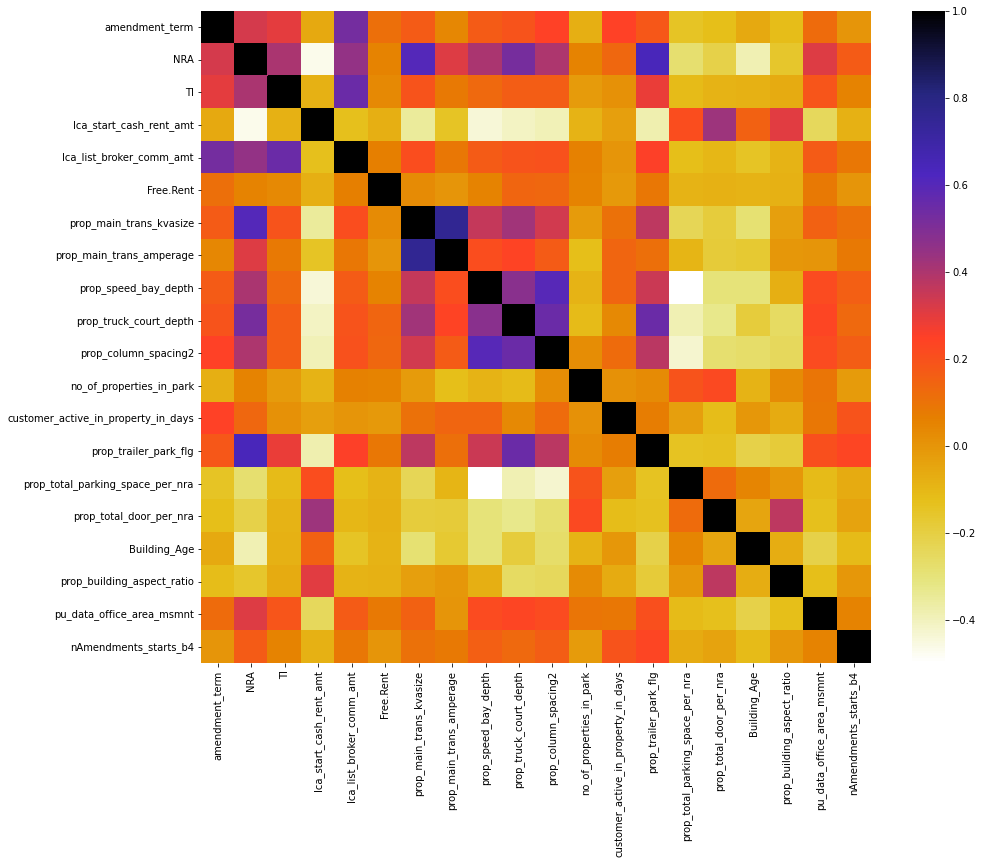

In [ ]:
corrmat=df.corr()
fig=plt.figure(figsize=(15,12))

sns.heatmap(corrmat,cmap=plt.cm.CMRmap_r)
plt.show()

**DROPPING TRUCK COURT DEPTH AND SPEED BAY DEPTH AS THEY ARE HIGHLY CORRELATED WITH THE NRA FEATURE**

In [ ]:
df.drop(columns=['prop_truck_court_depth','prop_main_trans_kvasize'],axis=1,inplace=True)

In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

,features,VIF_value
3,lca_start_cash_rent_amt,11.290331
0,amendment_term,7.379556
7,prop_speed_bay_depth,7.189120
8,prop_column_spacing2,7.065369
13,Building_Age,5.006665
14,prop_building_aspect_ratio,3.974923
10,customer_active_in_property_in_days,3.666513
11,prop_total_parking_space_per_nra,3.471121
12,prop_total_door_per_nra,3.471116
1,NRA,2.752829


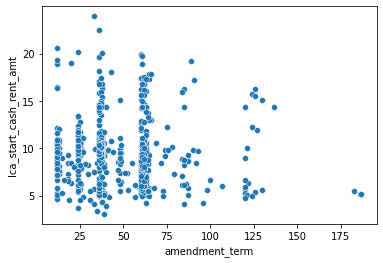

In [ ]:
sns.scatterplot(x='amendment_term',y='lca_start_cash_rent_amt',data=df)

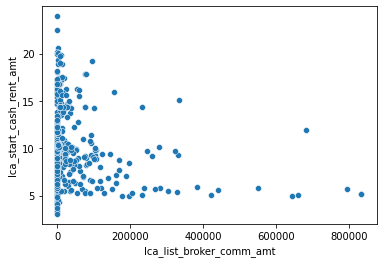

In [ ]:
sns.scatterplot(x='lca_list_broker_comm_amt',y='lca_start_cash_rent_amt',data=df)

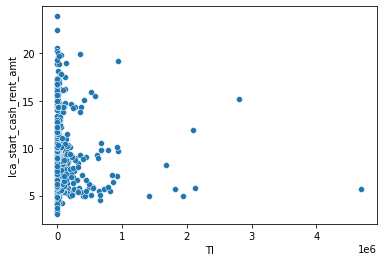

In [ ]:
sns.scatterplot(x='TI',y='lca_start_cash_rent_amt',data=df)

**DROPPING TI AS IT IS HIGHLY CORRELATED WITH THE COMM_AMT COLUMN**

In [ ]:
df.drop(columns=['TI'],axis=1,inplace=True)

In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

,features,VIF_value
2,lca_start_cash_rent_amt,11.233101
0,amendment_term,7.359715
6,prop_speed_bay_depth,7.176091
7,prop_column_spacing2,7.062022
12,Building_Age,4.986552
13,prop_building_aspect_ratio,3.974920
9,customer_active_in_property_in_days,3.665892
10,prop_total_parking_space_per_nra,3.470656
11,prop_total_door_per_nra,3.470529
1,NRA,2.621286


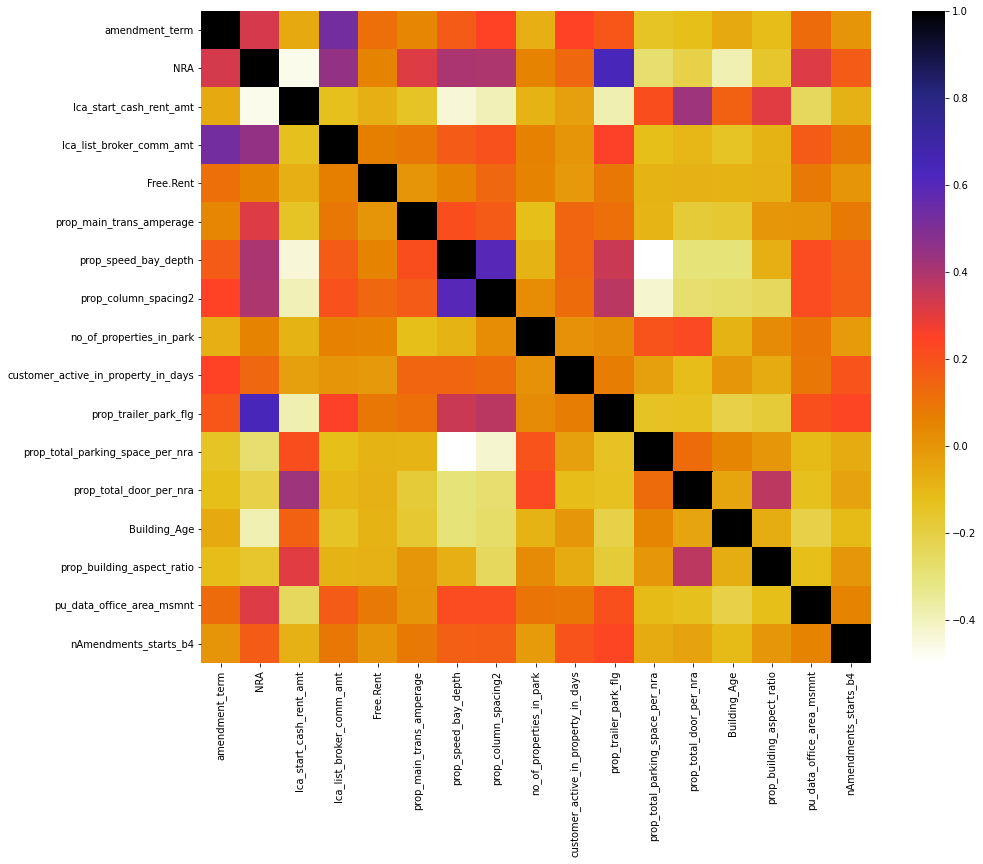

In [ ]:
corrmat=df.corr()
fig=plt.figure(figsize=(15,12))

sns.heatmap(corrmat,cmap=plt.cm.CMRmap_r)
plt.show()

**DROPPING prop_col_spacing2 AND PROP TRAILER FLAG**

In [ ]:
df.drop(columns=['prop_column_spacing2','prop_trailer_park_flg'],axis=1,inplace=True)

**WE NOW HAVE ALL VIF VALUES <5**

In [ ]:
cols_num=[col for col in df.columns if df[col].dtype=='float64' or df[col].dtype=='int32']
independent_feat=df[cols_num]
calculate_vif(independent_feat).sort_values(by='VIF_value',ascending=False)

,features,VIF_value
2,lca_start_cash_rent_amt,11.040370
0,amendment_term,7.080778
11,Building_Age,4.975087
6,prop_speed_bay_depth,4.833405
12,prop_building_aspect_ratio,3.868498
8,customer_active_in_property_in_days,3.664139
10,prop_total_door_per_nra,3.463935
9,prop_total_parking_space_per_nra,3.431060
1,NRA,2.590064
7,no_of_properties_in_park,2.446029


In [ ]:
df.drop('amendment_attr.amendment_start_dt',axis=1,inplace=True)

In [ ]:
df.drop('amendment_sign_dt',axis=1,inplace=True)

In [ ]:
df_num_features = df.select_dtypes(include =[np.number])

In [ ]:
df_num_features

,amendment_term,NRA,lca_start_cash_rent_amt,lca_list_broker_comm_amt,Free.Rent,prop_main_trans_amperage,prop_speed_bay_depth,no_of_properties_in_park,customer_active_in_property_in_days,prop_total_parking_space_per_nra,prop_total_door_per_nra,Building_Age,prop_building_aspect_ratio,pu_data_office_area_msmnt,nAmendments_starts_b4
0,12,179544.0,4.701709,0.00,0,360.000000,48.0,12,126144000.0,0.001735,0.000140,27,3.480597,5400,40
1,12,562089.0,5.248419,0.00,0,1200.000000,60.0,4,165715200.0,0.000655,0.000178,7,7.845865,3107,10
2,36,446050.0,4.956840,196708.05,0,5854.366352,60.0,19,94608000.0,0.001031,0.000177,9,1.387719,4966,2
3,42,124220.0,4.811051,0.00,0,800.000000,48.0,7,304905600.0,0.001288,0.000193,25,1.940711,5500,8
4,65,714773.0,5.576445,440842.21,5,900.000000,60.0,19,170985600.0,0.000891,0.000196,1,4.792683,6326,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,62,84772.0,8.880000,100414.24,2,800.000000,54.0,22,302572800.0,0.000885,0.000319,40,2.925714,1600,6
650,62,16618.0,10.080000,22893.45,1,1000.000000,53.0,4,161827200.0,0.001209,0.000239,30,2.753165,3179,0
651,37,6788.0,10.100000,6375.67,1,1400.000000,24.0,22,226108800.0,0.003090,0.000625,27,5.900000,3500,2
652,36,1785.0,10.380000,3239.58,0,1600.000000,0.0,1,94608000.0,0.003922,0.000442,31,2.590909,0,0


In [ ]:
df_cat_features = df.select_dtypes(exclude=[np.number, np.datetime64])

In [ ]:
df_cat_features = df_cat_features.drop('customer_tenant_naics_code', axis = 1)

In [ ]:
temp_df = df_cat_features.describe()

**DROPPING THOSE CATEGORICAL COLUMNS IN WHICH MAJORITY OF THE RECORDS ARE EITHER NA OR UNSPECIFIED**

In [ ]:
for i in temp_df.columns:
  if (temp_df.loc['top',i] == 'NA'):
    df_cat_features = df_cat_features.drop(i, axis = 1)

In [ ]:
for i in df_cat_features.columns:
  if len(df_cat_features[i].unique()) <= 5:
    df_cat_features = pd.concat([pd.get_dummies(df_cat_features[i], drop_first = True, prefix = i), df_cat_features], axis =1)
    df_cat_features = df_cat_features.drop(i, axis =1)

In [ ]:
df_cat_features = df_cat_features.drop(['market_code_US_LA_COUNTY','lease_type_code','submarket_code'], axis = 1)

In [ ]:
df_cat_features = df_cat_features.drop(['customer_tenant_naics_name'], axis = 1)

In [ ]:
for i in ['warehouse_lighting_type','mezzanine_lighting_type','office_lighting_type','ext_site_light_type','prop_exterior_lighting','prop_building_facade','property_city','lease_type_name','customer_category']:
  df_cat_features = pd.concat([pd.get_dummies(df_cat_features[i], drop_first = True, prefix = i), df_cat_features], axis =1)
  df_cat_features = df_cat_features.drop(i, axis =1)

In [ ]:
df_cat_features = df_cat_features.drop(['submarket_name','usage_type_descr','building_structre_desc','fire_suppn_sys_desc','seismic_mitigation_desc','proprollup_code'], axis =1)

In [ ]:
df_cat_features

,customer_category_Charity/Prof.Services/Other,customer_category_Manufacturer,customer_category_Retailer,customer_category_Transportation/Freight/Delivery,customer_category_Unspecified,customer_category_Wholesaler,lease_type_name_Modified Gross,lease_type_name_Modified Gross - Property Management Fee,lease_type_name_Prologis Clear Lease,lease_type_name_Triple Net,lease_type_name_Triple Net - Property Management Fee,property_city_Carson,property_city_Cerritos,property_city_Chatsworth,property_city_Chino,property_city_City of Commerce,property_city_City of Industry,property_city_Colton,property_city_Commerce,property_city_Compton,property_city_Corona,property_city_Downey,property_city_El Segundo,property_city_Fontana,property_city_Hawthorne,property_city_Inglewood,property_city_La Mirada,property_city_Long Beach,property_city_Los Angeles,property_city_Mira Loma,property_city_Montebello,property_city_Moreno Valley,property_city_Ontario,property_city_Pico Rivera,property_city_Pomona,property_city_Rancho Cucamonga,property_city_Rancho Dominguez,property_city_Redlands,property_city_Rialto,property_city_Riverside,property_city_San Bernardino,property_city_Santa Fe Springs,property_city_Sylmar,property_city_Torrance,property_city_Van Nuys,property_city_Vernon,property_city_Whittier,prop_building_facade_Concrete Block-Metal Panel,prop_building_facade_Metal Panel,prop_building_facade_NA,prop_building_facade_Other,prop_building_facade_Tilt-Up Concrete,prop_exterior_lighting_LED,prop_exterior_lighting_Metal Halide,prop_exterior_lighting_NA,prop_exterior_lighting_Other,prop_exterior_lighting_Sodium Vapor,ext_site_light_type_Metal Halide,ext_site_light_type_NA,ext_site_light_type_Other,ext_site_light_type_Sodium Vapor,ext_site_light_type_T12 Fluorescent,ext_site_light_type_T8/T5 Fluorescent,office_lighting_type_NA,office_lighting_type_No Office Space,office_lighting_type_Other,office_lighting_type_T10 Fluorescent,office_lighting_type_T12 Fluorescent,office_lighting_type_T5/T8 Fluorescent,office_lighting_type_T8/T5 Fluorescent,mezzanine_lighting_type_NA,mezzanine_lighting_type_No Mezzanine Space,mezzanine_lighting_type_Other,mezzanine_lighting_type_T12 Fluorescent,mezzanine_lighting_type_T5 Fluorescent,mezzanine_lighting_type_T8 Fluorescent,mezzanine_lighting_type_T8/T5 Fluorescent,warehouse_lighting_type_Metal Halide,warehouse_lighting_type_NA,warehouse_lighting_type_No Warehouse Space,warehouse_lighting_type_Other,warehouse_lighting_type_T10 Fluorescent,warehouse_lighting_type_T12 Fluorescent,warehouse_lighting_type_T5/T8 Fluorescent,warehouse_lighting_type_T8/T5 Fluorescent,customer_type_name_Unspecified,dct_flg_1,is_first_time_customer_1,smart_meter_system_No,smart_meter_system_Yes,hvac_warehouse_HVAC,hvac_warehouse_NA,hvac_warehouse_No,hvac_warehouse_None,fire_suppression_system_ESFR,fire_suppression_system_NA,fire_suppression_system_Other,sub_metering_No,sub_metering_Yes,cross_dock_No,cross_dock_Yes,skylights_flg_Y,origin_code_Legacy DCT,origin_code_Legacy KTR,origin_code_Legacy PLD,origin_code_PLD,property_source_code_Acquisition - Redevelopment,property_source_code_Acquisition - VAA VAC,property_source_code_Development - Build to Suit,property_source_code_Development - Speculative,strategy_code_Held for Sale,strategy_code_Hold,strategy_code_Not Applicable,strategy_code_Sold,irrigation_system_flg_Y,elevator_flg_Y,ramped_building_flg_Y,trailer_park_flg_Y,prop_wind_No,prop_solar_pv_No,prop_solar_pv_Yes,prop_solar_hot_water_No,prop_hydrogen_frklft_No,prop_hydrogen_frklft_Yes,prop_geothermal_No,prop_fuel_cell_No,prop_electric_car_charging_No,prop_electric_car_charging_Yes,prop_backup_generator_No,prop_backup_generator_Yes,prop_cross_dock_No,prop_cross_dock_Yes,prop_rail_served_No,prop_rail_served_Yes,prop_main_trans_voltage_120/240,prop_main_trans_voltage_220/480,prop_main_trans_voltage_277/480,prop_main_trans_voltage_NA,prop_main_trans_owner_Prologis,prop_main_trans_owner_Utility,commercial_flag_Y,ownr_accntg_treatmt_name_Unconsolidated,

**DATA PREPROCESSING**

In [ ]:
df_num_features = df_num_features.drop('lca_start_cash_rent_amt', axis = 1)

In [ ]:
final_df = pd.concat([df_num_features, df_cat_features], axis = 1)

In [ ]:
X = final_df # Independent variables
Y = df['lca_start_cash_rent_amt'] # Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
X_train.iloc[:,0:13]= object.fit_transform(X_train.iloc[:,0:13])

In [ ]:
X_test.iloc[:,0:13] = object.transform(X_test.iloc[:,0:13])

In [ ]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
X= object.fit_transform(X)

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
regressor_OLS = sm.OLS(Y, X).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
regressor_OLS.params.sort_values(ascending=False)

prop_total_door_per_nra                                     2.616694e+03
prop_total_parking_space_per_nra                            2.124274e+02
property_city_El Segundo                                    1.435549e+01
property_city_Downey                                        8.862991e+00
property_city_Los Angeles                                   6.082213e+00
prop_exterior_lighting_NA                                   5.775121e+00
hvac_warehouse_No                                           5.532301e+00
prop_building_facade_Metal Panel                            5.459135e+00
property_city_Inglewood                                     4.943924e+00
property_source_code_Acquisition - VAA VAC                  3.911971e+00
property_city_Torrance                                      3.699125e+00
property_city_Hawthorne                                     3.696311e+00
property_city_City of Commerce                              3.289032e+00
property_city_Commerce                             

In [ ]:
print(regressor_OLS.summary())

                               OLS Regression Results                              
Dep. Variable:     lca_start_cash_rent_amt   R-squared:                       0.767
Model:                                 OLS   Adj. R-squared:                  0.699
Method:                      Least Squares   F-statistic:                     11.23
Date:                     Fri, 26 Aug 2022   Prob (F-statistic):           6.91e-95
Time:                             15:10:30   Log-Likelihood:                -1256.2
No. Observations:                      654   AIC:                             2810.
Df Residuals:                          505   BIC:                             3478.
Df Model:                              148                                         
Covariance Type:                 nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

**MODELLING**

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)



LinearRegression()

In [ ]:
predictions=model.predict(X_test)
print('MAE:', mean_absolute_error(Y_test,predictions))
print('MAPE:', mean_absolute_percentage_error(Y_test,predictions))
print('r2 score:', r2_score(Y_test,predictions))


MAE: 1.504003510323806
MAPE: 0.17964831946426718
r2 score: 0.46272901653824383
